<h1>Monte Carlo Options Pricing</h1>

In this python notebook, we will be pricing exotic options by using Monte-Carlo simulation. The asset will first be modelled by a stochastic process, then a Monte-Carlos simulation will be run to simulate the asset's price dynamics, and finally the fair value will be computed.

<h2> 1.0 Importing necessary packages </h2>

Packages:

- MC: For running Monte-Carlo simulation
- optionsMC: For simulating different type of options conditions, payoffs
- stochastic_process_simulation: For modelling asset price dynamics

In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from src.stochastic_process_simulation import *
from src.data_processing import *


<h2> 2.0 Download Data</h2>

[*********************100%%**********************]  1 of 1 completed


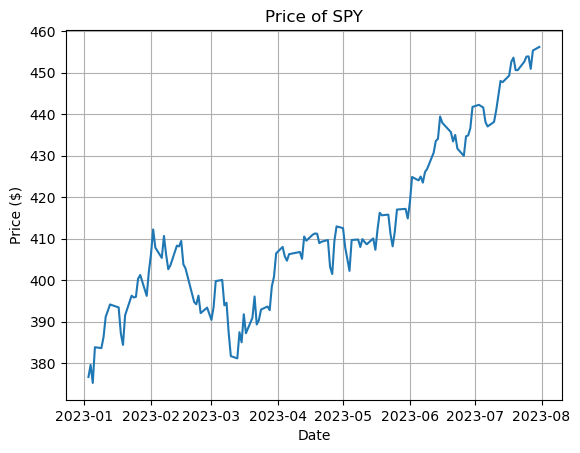

In [53]:
# Define the ticker symbol
ticker_symbol = "SPY"  # S&P 500's ticker symbol on Yahoo Finance
start_date = '2023-01-01'
end_date = '2023-08-01'
# Fetch the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)
# Take adjusted closing price
prices = data['Adj Close'].values

# Plot prices
plt.plot(data['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Price of SPY")
plt.grid()

<h2> 3.0 Simulating SPY with GBM </h2>

mu: 0.3376459321116511, sigma: 0.13712469535132357


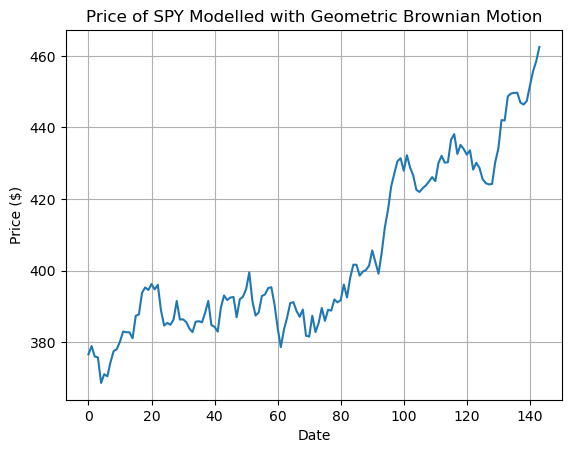

In [54]:
# Initialising and fitting model
spy_process = GBM(initial_price = prices[0], tau = len(prices)/252, n_steps = len(prices))
params = spy_process.fit(prices, method = 'mle')
print(f"mu: {params[0]}, sigma: {params[1]}")

# Plotting simulated GBM process
spy_process.simulate()
spy_simulation = spy_process.get_simulation()

# Plotting simulation
plt.plot(spy_simulation)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Price of SPY Modelled with Geometric Brownian Motion")
plt.grid()

<h2> 4.0 Simulating SPY's Volatility with CIR Process</h2>

kappa: 0.18340873828418428, theta: 0.15684799585011602, sigma: 0.00697483377438983


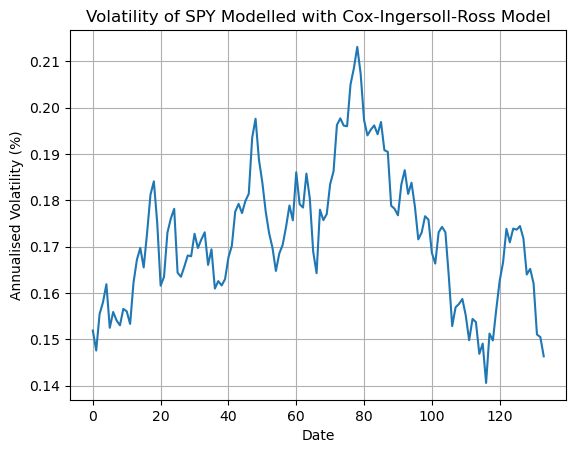

In [55]:
# Compute annualised volatility
annualised_vol = compute_annualised_volatility(prices)

# Initialising and fitting volatility model
vol_process = CIRProcess(initial_price = annualised_vol[0], tau = len(annualised_vol)/252, n_steps = len(annualised_vol))
params = vol_process.fit(annualised_vol, method = 'mle')
print(f"kappa: {params[0]}, theta: {params[1]}, sigma: {params[2]}")

# Simulating volatility process
vol_process.simulate()
vol_simulation = volatility_process.get_simulation()

# Plotting simulated volatility process
plt.plot(vol_simulation)
plt.xlabel("Date")
plt.ylabel("Annualised Volatility (%)")
plt.title("Volatility of SPY Modelled with Cox-Ingersoll-Ross Model")
plt.grid()

<h2> 5.0 Simulating SPY with Heston Model </h2>

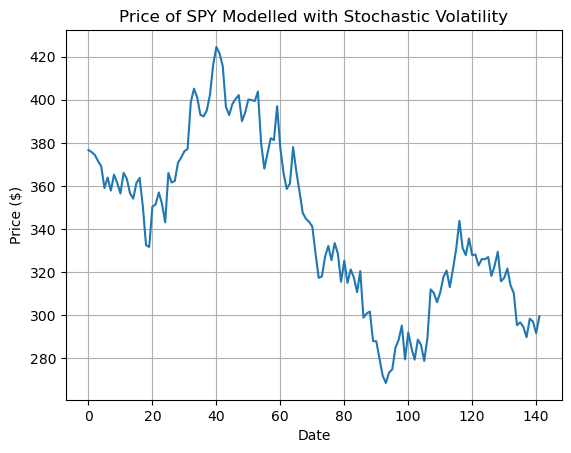

In [61]:
# Ensuring prices and volatility are in the same shape
prices = prices[:len(annualised_vol)]

# Initialising and fitting Heston's model
heston_model = StochasticVolatility(initial_price = prices[0], tau = len(prices)/252, n_steps = len(prices), volatility_process = vol_process)
heston_model.fit(data=prices, method='moments')

# Simulating Heston's model
heston_model.simulate()
heston_simulation = heston_model.get_simulation()

# Plotting simmulation
plt.plot(heston_simulation)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Price of SPY Modelled with Stochastic Volatility")
plt.grid()

142

142